<div style="width: 400px; height: 160px;">
    <img src="rplogo_small.png" width="100%" height="100%" align="left">
</div>

###     TIPP - AAI Assignement (Deep Learning Fundamentals)<br>Due Date: 21 February 2020
###     Submitted By: <u>KOAY</u> SENG TIAN<br>Email: sengtian@yahoo.com


In [1]:
# TIPP - AAI Assignment (Deep Learning Fundamentals)
# Date Due: 21February 2020
# Submited By: KOAY SENG TIAN
# Email: sengtian@yahoo.com
#
# GitHub: https://github.com/koayst/rp_deeplearning_assignment
#
# Note: source of below statement => sonar.names
# https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29
# Gorman and Sejnowski further report that a nearest neighbor classifier on
# the same data gave an 82.7% probability of correct classification.

from keras import models
from keras import layers
from keras import losses
from keras.optimizers import SGD

import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import numpy as np
import os
import pandas as pd

pd.set_option('display.max_rows', 210)

# for reproducibility
np.random.seed(1337)

# verbose mode - 0=show little, 1=show more like charts
verbose=0

Using TensorFlow backend.


In [2]:
def load_data():
    filedir = os.path.join(os.getcwd(), 'data')
    mines_filename = 'sonar.mines'
    rocks_filename = 'sonar.rocks'
    sonar_filename = 'sonar.all-data'

    # load the data file
    file = os.path.join(filedir, sonar_filename)
    df = pd.read_csv(file, sep=',', header=None)
    
    # create the header for the dataframe
    # the header starts with 'ANG' followed by a number
    header = [f"ANG{x:02d}" for x in range(0, df.shape[1])]
    df.columns = header
    
    return df

In [3]:
def exploratory_data_analysis(df):
    print('Any null ?', end=' ')
    print(df.isnull().values.any())
    print()
    print('NULL count in each column:')
    print(df.isnull().sum())
    print()
    print('Any NaN ?', end=' ')
    print(sonar_df.isna().any().any())
    print()
    print('ZERO count in each column:')
    # columns 42 to 59 have 0 values, but it is still OK
    # as the document said 'each pattern is a set of 60 
    # numbers in the range 0.0 to 1.0 [sonar.names]
    print(df.eq(0).sum())
    print()
    
    # True if the dtype is object (categorical), otherwise False
    mask = sonar_df.dtypes == np.object
    # Extract column names that are categorical
    categorical_cols = sonar_df.columns[mask]
    print('What are the categorical column(s)?', end=' ')
    print(categorical_cols)
    print()
   
    # Extract categorical data
    categorical_data = sonar_df.select_dtypes(include=['object']).copy()
    
    # Count the number of cateory for each column
    print('Unique value count of categorical columns:')
    unique_values_counts = (categorical_data.apply(lambda x: x.nunique()).sort_values(ascending=False))
    print(unique_values_counts)
    print()
    
    print('Unique value of categorical columns:')
    print(categorical_data.apply(pd.Series.value_counts))

In [4]:
def charts(df):
    df.plot.box(figsize=(12,7))
    plt.xticks(np.arange(0, 61, 5.0), [f"ANG{x:02d}" for x in range(0, 61, 5)], rotation=45)
    plt.title('Boxplot for all 60 Angles')
    plt.show()
    

In [5]:
sonar_df = load_data()
sonar_df.shape

if verbose==1:
    print(sonar_df.head())
    print(sonar_df.tail())
    print(sonar_df.info())

    charts(sonar_df)

(208, 61)

In [6]:
if verbose==1:
    exploratory_data_analysis(sonar_df)


In [7]:
X = sonar_df.loc[:, sonar_df.columns != 'ANG60'].copy()
y = sonar_df.loc[:, 'ANG60'].copy()


In [8]:
# perform label encoding on Y
lbl_encoder = LabelEncoder()
y_encoded = lbl_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)

# standard scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train = std_scaler.transform(X_train)
X_test = std_scaler.transform (X_test)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
# build the Artifical Neuro Network
network = models.Sequential()
network.add(layers.Dense(32, activation='relu', input_shape=(60,)))
network.add(layers.Dense(1, activation='sigmoid'))

In [10]:
# use stochastic gradient descent as optimizer
sgd = SGD(lr = 0.01, momentum = 0.8, decay = 0.01, nesterov = True)
network.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

network.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1952      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = network.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=30, shuffle=True, verbose=1)

print()
test_loss, test_acc = network.evaluate(X_test, y_test)

print()
print('test_acc:', test_acc)




Train on 132 samples, validate on 34 samples
Epoch 1/50





132/132 [==============================] - 0s 4ms/step - loss: 0.9877 - acc: 0.4545 - val_loss: 0.8109 - val_acc: 0.4412
Epoch 2/50
132/132 [==============================] - 0s 237us/step - loss: 0.7714 - acc: 0.5076 - val_loss: 0.6434 - val_acc: 0.6471
Epoch 3/50
132/132 [==============================] - 0s 118us/step - loss: 0.6456 - acc: 0.6212 - val_loss: 0.5561 - val_acc: 0.6471
Epoch 4/50
132/132 [==============================] - 0s 118us/step - loss: 0.5801 - acc: 0.6818 - val_loss: 0.5086 - val_acc: 0.7353
Epoch 5/50
132/132 [==============================] - 0s 118us/step - loss: 0.5410 - acc: 0.7197 - val_loss: 0.4820 - val_acc: 0.7059
Epoch 6/50
132/132 [==============================] - 0s 237us/step - loss: 0.5135 - acc: 0.7500 - val_loss: 0.4599 - val_acc: 0.7353
Epoch 7/50
132/132 [==============================] - 0s 237us/step - loss: 0.4903 - acc: 0.7727 - val_loss: 0.4431 - val_acc: 0.8235
Epoch 8/50


132/132 [==============================] - 0s 151us/step - loss: 0.2335 - acc: 0.9545 - val_loss: 0.3010 - val_acc: 0.9118
Epoch 49/50
132/132 [==============================] - 0s 303us/step - loss: 0.2311 - acc: 0.9545 - val_loss: 0.2995 - val_acc: 0.9118
Epoch 50/50
132/132 [==============================] - 0s 182us/step - loss: 0.2287 - acc: 0.9545 - val_loss: 0.2986 - val_acc: 0.9118

42/42 [==============================] - 0s 381us/step

test_acc: 0.8809523837906974


In [12]:
# from the above, the test accuracy is ~88%

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

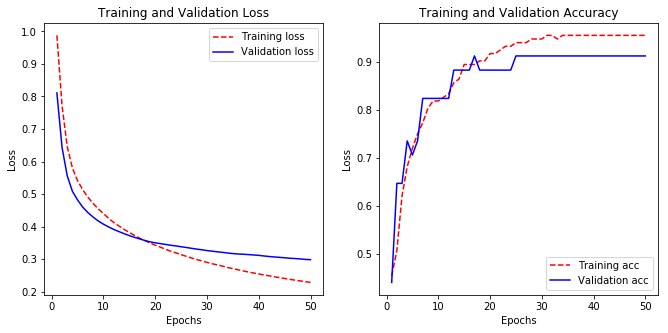

In [13]:
fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#draw a chart to show validation vs training losses
ax1.plot(epochs, loss_values, 'r--', label='Training loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validation loss')
ax1.title.set_text('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# draw a chart to show validation vs training accuracy
ax2.plot(epochs, acc_values, 'r--', label='Training acc')
ax2.plot(epochs, val_acc_values, 'b', label='Validation acc')
ax2.title.set_text('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()
